#Тема 2. Свойства оценок.
##Задача 1 (к теоретической задаче 1).

Подключаем библиотеки, чтобы всё работало

In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Создаём список оценок
$$\hat{\theta_0} = 2\overline{X}$$
$$\hat{\theta_1} = \overline{X} + X_{(n)}/2$$
$$\hat{\theta_2} = (n + 1) X_{(1)}$$
$$\hat{\theta_3} = X_{(1)} +  X_{(n)}$$
$$\hat{\theta_4} = \frac{n + 1}{n}X_{(n)}$$

In [2]:
class Estimator:
    def __init__(self, function, tex_description):
        self.function = function
        self.tex_description = tex_description
        
theta_hat = [
    Estimator(lambda sample: 2 * sample.mean(),
              r"$2\overline{X}$"),
    Estimator(lambda sample: sample.mean() + (sample.max() / 2),
              r"$\overline{X} + X_{(n)}/2$"),
    Estimator(lambda sample: (len(sample) + 1) * sample.min(),
              r"$(n + 1) X_{(1)}$"),
    Estimator(lambda sample: sample.min() + sample.max(),
              r"$X_{(1)} +  X_{(n)}$"),
    Estimator(lambda sample: (len(sample) + 1) / len(sample) * sample.max(),
              r"$\frac{n + 1}{n}X_{(n)}$")]

Пишем функцию, которая по выборке $sample$, истинному значению параметра $theta$ и списку оценок $estimators$ строит график высоты $plot\_height$, на котором изображён модуль разности между истинным значением параметра и его оценкой для каждого префикса выборки $sample$.

In [3]:
def gen_prefixes(some_list):
    prefixes = []
    for i in range(1, len(some_list) + 1):
        prefixes.append(some_list[0:i])
    return prefixes

def normalize(values, teta):
    return list(map(lambda x: abs(x - teta), values))

def draw_plot(sample, theta, estimators, plot_height):
    sample_prefixes = gen_prefixes(sample)
    plt.figure(figsize=(12, 5)).suptitle("theta = " + str(theta), fontsize=14)
    plt.axis([0, len(sample), 0, plot_height])
    plt.rc('text', usetex=True)
    
    for estimator in estimators:
        #считаем оценку параметра на каждом префиксе выборки
        #затем «нормализуем»: находим модуль разности
        #между истинным значением и оценкой
        plt.plot(normalize(map(estimator.function, sample_prefixes), theta),
                 label=estimator.tex_description)
        
    plt.legend()
    plt.show()

Подготовительная работа закончена, теперь можно строить графики. К сожалению, так и не удалось подобрать значение параметра $\theta$ для которого оценка $\theta_2 = (n + 1) X_{(1)}$ дала бы хороший результат.

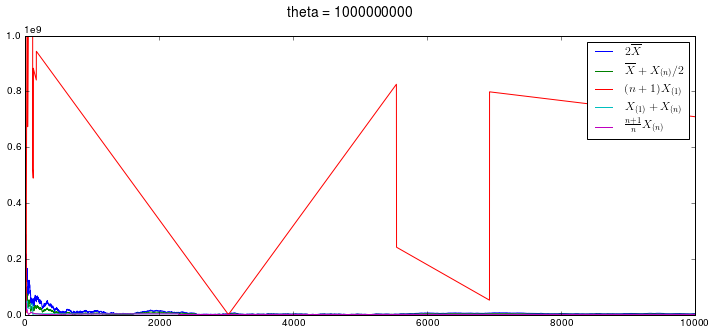

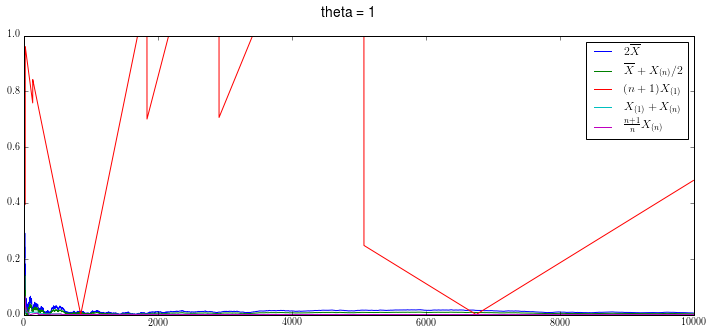

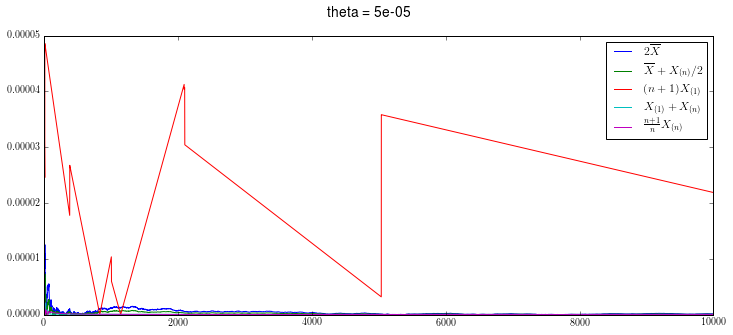

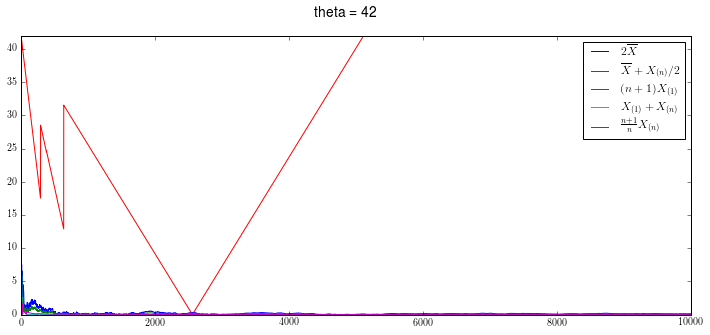

In [4]:
N = 10000

theta = 1000000000
draw_plot(sps.uniform.rvs(0, theta, N), theta, theta_hat, theta)
theta = 1
draw_plot(sps.uniform.rvs(0, theta, N), theta, theta_hat, theta)
theta = 0.00005
draw_plot(sps.uniform.rvs(0, theta, N), theta, theta_hat, theta)
theta = 42
draw_plot(sps.uniform.rvs(0, theta, N), theta, theta_hat, theta)

Поэтому исключим эту оценку и построим график для остальных.

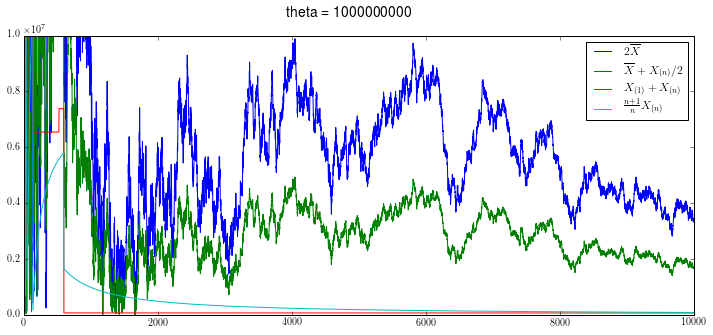

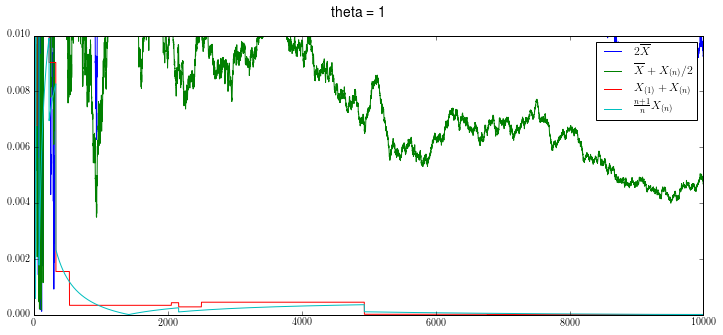

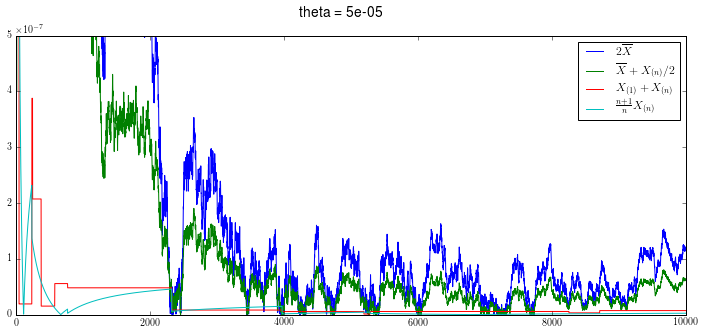

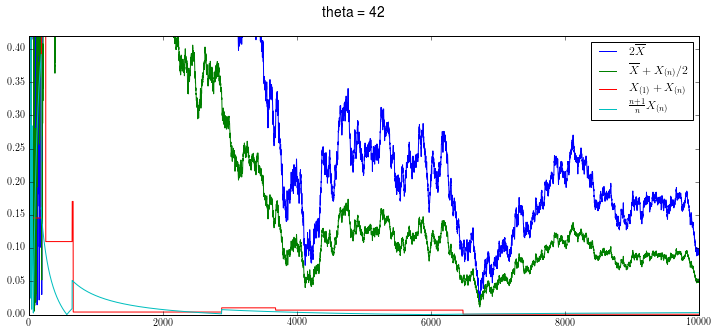

In [5]:
thetas_good_enought = [theta_hat[0], theta_hat[1], theta_hat[3], theta_hat[4]]
theta = 1000000000
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_good_enought, theta / sqrt(N))
theta = 1
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_good_enought, theta / sqrt(N))
theta = 0.00005
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_good_enought, theta / sqrt(N))
theta = 42
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_good_enought, theta / sqrt(N))

На графиках видно, что при всех значениях параметра оценка $\theta_0 = 2\overline{X}$ худшая из оставшихся оценок, а оценки $\theta_3 = X_{(1)} +  X_{(n)}$ и $theta_4 = \frac{n + 1}{n}X_{(n)}$ лидируют в смысле минимальности модуля разности между оценкой и истинным значением параметра. Возьмём новый масштаб и сравним лидирующие оценки.

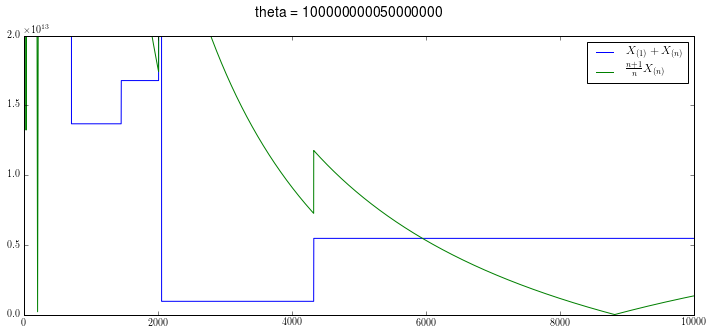

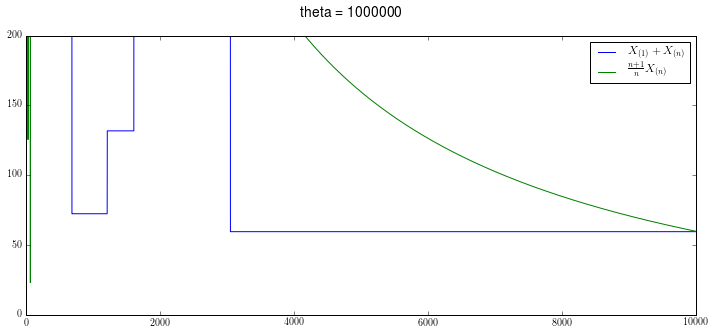

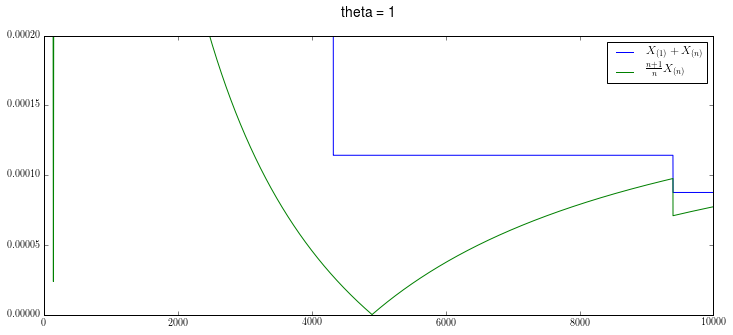

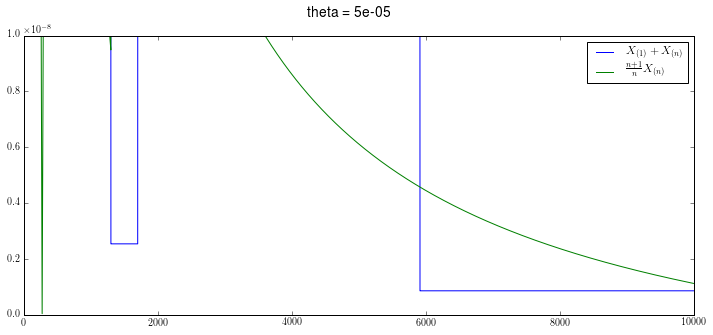

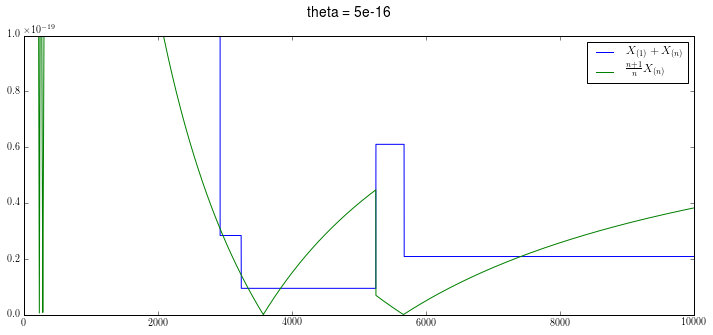

In [6]:
thetas_the_best = [theta_hat[3], theta_hat[4]]

theta = 100000000050000000
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_the_best, theta / (N/2))
theta = 1000000
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_the_best, theta / (N/2))
theta = 1
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_the_best, theta / (N/2))
theta = 0.00005
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_the_best, theta / (N/2))
theta = 0.0000000000000005
draw_plot(sps.uniform.rvs(0, theta, N), theta, thetas_the_best, theta / (N/2))

Оценки $\theta_3 = X_{(1)} +  X_{(n)}$ и $theta_4 = \frac{n + 1}{n}X_{(n)}$ одинаково хороши. При перегенерации графиков лидирует то одна, то другая.